<a href="https://colab.research.google.com/github/ritwikraha/computer-needs-glasses/blob/master/image-generation/Depth_Anything_Model-Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/LiheYoung/Depth-Anything


Cloning into 'Depth-Anything'...
remote: Enumerating objects: 406, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 406 (delta 76), reused 71 (delta 27), pack-reused 265
Receiving objects: 100% (406/406), 237.89 MiB | 25.40 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Updating files: 100% (219/219), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
%cd Depth-Anything

/content/Depth-Anything


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl siz

In [6]:
import numpy as np
from PIL import Image
import cv2
import torch
import requests
from io import BytesIO

from depth_anything.dpt import DepthAnything
from depth_anything.util.transform import Resize, NormalizeImage, PrepareForNet
from torchvision.transforms import Compose

In [7]:
model = DepthAnything.from_pretrained("LiheYoung/depth_anything_vitl14")

config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

In [8]:
transform = Compose([
        Resize(
            width=512,
            height=512,
            resize_target=False,
            keep_aspect_ratio=True,
            ensure_multiple_of=14,
            resize_method='lower_bound',
            image_interpolation_method=cv2.INTER_CUBIC,
        ),
        NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        PrepareForNet(),
    ])

In [9]:
image_url = 'https://i.imgur.com/iWjdvXK.jpg'

# Download the image from the URL
response = requests.get(image_url)

# Ensure successful download
response.raise_for_status()

# Open the image using PIL
image = Image.open(BytesIO(response.content))

# Rest of your code remains the same
image = np.array(image) / 255.0
image = transform({'image': image})['image']
image = torch.from_numpy(image).unsqueeze(0)

depth = model(image)


In [12]:
import matplotlib.pyplot as plt

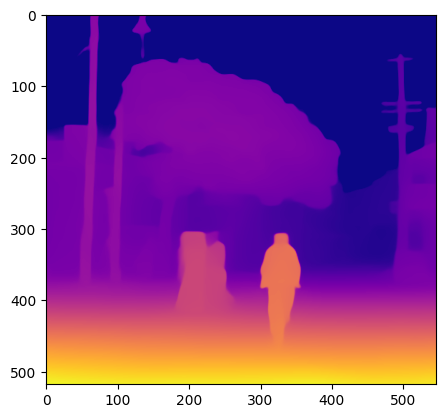

In [15]:
plt.imshow(depth.detach().squeeze().cpu().numpy(), cmap='plasma')